Reinforcement learning algorithm for solving mazes
====

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from ExtremeLearningMachine import EnsembleELM

In [ ]:
# Define a maze
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# Define start and goal
S = [1 , 1]
G = [10, 10]

# epsilon-greedy TD algorithm

In [ ]:
epsilon = 0.6
alpha = 0.3
gamma = 0.95
loop = 500

# Initialize the value function
V = np.zeros((12, 12))

# The reward difinition
r_func = lambda xy: 1 if all(xy == np.array(G)) else 0

# 学習エピソードのループ
learning_count = []

for i in range(loop):
    # Initialize the location of the agent
    agent = np.array(S)
    
    # Initialize the counter
    count = 0
    
    while True:
        # Choice an action
        p = np.random.random()
        xy_choice = [agent + np.array([x,y]) for (x,y) in [(1,0),(0,1),(-1,0),(0,-1)] if maze[tuple(agent + np.array([x,y]))] == 0]
        if p > epsilon:
            choice = np.array([r_func(xy) + gamma * V[tuple(xy)] for xy in xy_choice])
            new_agent = xy_choice[np.argmax(choice)]
        else:
            new_agent = xy_choice[np.random.randint(len(xy_choice))]
        
        r = r_func(new_agent)
        
        # Update the value function
        V[tuple(agent)] += alpha * (r + gamma * V[tuple(new_agent)] - V[tuple(agent)])
        
        # End loop
        if r_func(agent) == 1:
            break

        # Update agent
        agent = new_agent
        
        # Update counter
        count += 1
    
    if i % 50 == 0:
        print("The agent took %s times to reach at the goal." % str(count))
    learning_count.append(count)

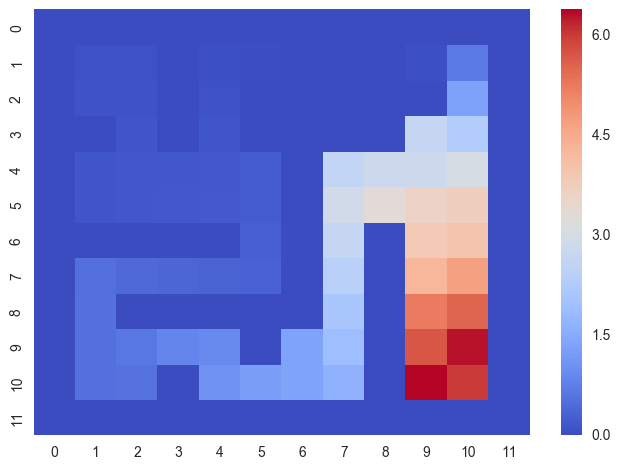

In [4]:
# plotting
seaborn.heatmap(V, cmap="coolwarm");

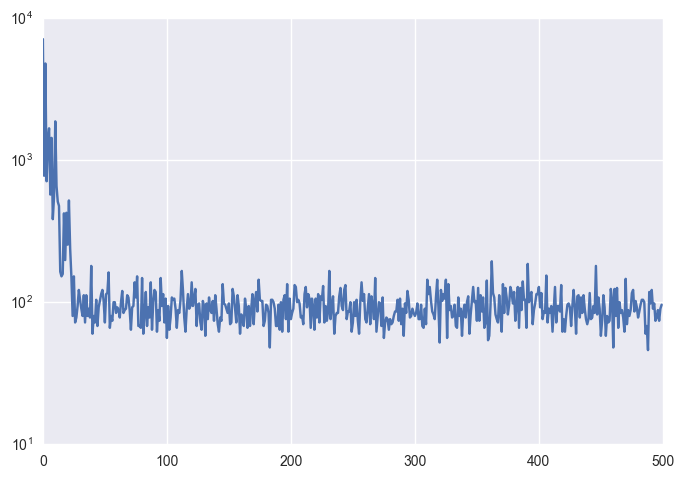

In [5]:
plt.semilogy(learning_count)
plt.show()

# Q-ExtremeLearningMachine algorithm